<a href="https://colab.research.google.com/github/nischaydhamija/MCA308Assignments/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

df = pd.DataFrame(np.random.randint(1,201,(100,30)))
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,103,180,93,15,107,72,189,21,103,122,...,88,158,38,130,192,188,21,161,58,22
1,89,49,59,170,188,15,190,190,175,190,...,18,132,89,60,14,9,90,53,130,84
2,92,111,188,199,172,8,175,35,81,164,...,146,44,162,190,14,95,48,15,200,190
3,40,82,111,53,24,154,188,124,41,157,...,139,81,136,163,163,33,123,5,41,28
4,135,72,12,162,33,48,151,62,37,99,...,103,27,137,15,90,42,124,179,63,96


In [7]:
df_na = df.mask((df >= 10) & (df <= 60))

print("\nNA count per row:")
print(df_na.isna().sum(axis=1))

print("\nNA count per column:")
print(df_na.isna().sum(axis=0))


NA count per row:
0      7
1     11
2      8
3      9
4      8
      ..
95    10
96     9
97     9
98     7
99    10
Length: 100, dtype: int64

NA count per column:
0     23
1     22
2     21
3     18
4     26
5     28
6     23
7     27
8     21
9     17
10    26
11    24
12    23
13    28
14    23
15    34
16    31
17    31
18    34
19    20
20    24
21    26
22    23
23    31
24    27
25    26
26    31
27    27
28    31
29    31
dtype: int64


In [8]:
df_filled = df_na.fillna(df_na.mean())
print("\nAfter filling NA with column mean:")
df_filled.head()


After filling NA with column mean:


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,103.000000,180.000000,93.000000,127.792683,107.000000,72.000000,189.0,110.739726,103.000000,122.0,...,88.000000,158.000000,124.766234,130.000000,192.000000,188.000000,121.869565,161.000000,118.652174,127.724638
1,89.000000,124.448718,110.063291,170.000000,188.000000,121.069444,190.0,190.000000,175.000000,190.0,...,125.447368,132.000000,89.000000,123.797101,124.479452,9.000000,90.000000,121.863014,130.000000,84.000000
2,92.000000,111.000000,188.000000,199.000000,172.000000,8.000000,175.0,110.739726,81.000000,164.0,...,146.000000,123.094595,162.000000,190.000000,124.479452,95.000000,121.869565,121.863014,200.000000,190.000000
3,130.116883,82.000000,111.000000,127.792683,120.810811,154.000000,188.0,124.000000,123.556962,157.0,...,139.000000,81.000000,136.000000,163.000000,163.000000,125.405405,123.000000,5.000000,118.652174,127.724638
4,135.000000,72.000000,110.063291,162.000000,120.810811,121.069444,151.0,62.000000,123.556962,99.0,...,103.000000,123.094595,137.000000,123.797101,90.000000,125.405405,124.000000,179.000000,63.000000,96.000000


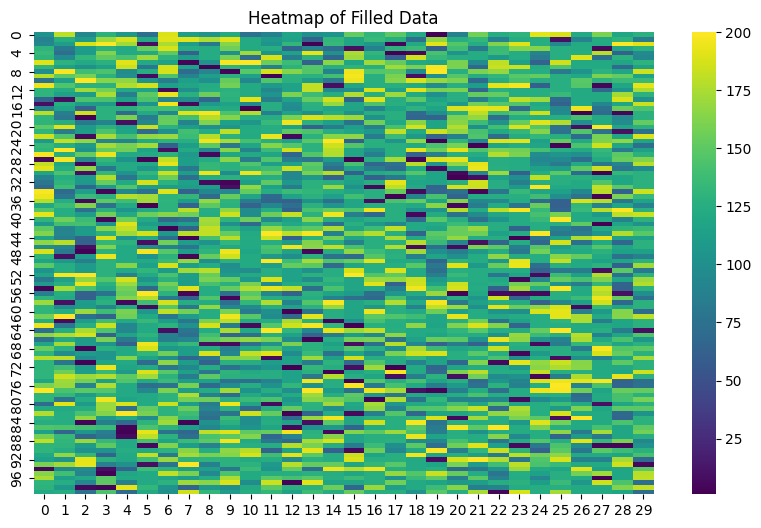

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df_filled, cmap="viridis")
plt.title("Heatmap of Filled Data")
plt.show()

In [10]:
corr = df_filled.corr()
columns_with_low_corr = (corr.mean() <= 0.7).sum()

print("\nNumber of columns with correlation <= 0.7:", columns_with_low_corr)


Number of columns with correlation <= 0.7: 30


In [11]:
df_norm = (df_filled - df_filled.min()) / (df_filled.max() - df_filled.min()) * 10
print("\nNormalized DataFrame (0 to 10):")
df_norm.head()


Normalized DataFrame (0 to 10):


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,5.102041,8.963731,4.595960,6.385415,5.329949,3.585859,9.641026,5.514559,5.179487,6.102564,...,4.416244,7.889447,6.161543,6.548223,9.639175,9.390863,6.073847,8.080808,5.849601,6.562815
1,4.387755,6.085426,5.457742,8.527919,9.441624,6.064113,9.692308,9.497487,8.871795,9.589744,...,6.317125,6.582915,4.336735,6.233355,6.158735,0.304569,4.472362,6.104193,6.428571,4.224599
2,4.540816,5.388601,9.393939,10.000000,8.629442,0.353535,8.923077,5.514559,4.051282,8.256410,...,7.360406,6.135407,8.061224,9.593909,6.158735,4.670051,6.073847,6.104193,10.000000,9.893048
3,6.485555,3.886010,5.505051,6.385415,6.031006,7.727273,9.589744,6.180905,6.233690,7.897436,...,7.005076,4.020101,6.734694,8.223350,8.144330,6.213472,6.130653,0.202020,5.849601,6.562815
4,6.734694,3.367876,5.457742,8.121827,6.031006,6.064113,7.692308,3.065327,6.233690,4.923077,...,5.177665,6.135407,6.785714,6.233355,4.381443,6.213472,6.180905,8.989899,3.010204,4.866310


In [12]:
df_bin = df_norm.applymap(lambda x: 0 if x <= 5 else 1)
print("\nBinary Encoded DataFrame:")
df_bin.head()


Binary Encoded DataFrame:


/tmp/ipython-input-3663565122.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_bin = df_norm.applymap(lambda x: 0 if x <= 5 else 1)


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1,0,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,0,1,1,1,1,1,1,1,1,1,...,1,1,0,1,1,0,0,1,1,0
2,0,1,1,1,1,0,1,1,0,1,...,1,1,1,1,1,0,1,1,1,1
3,1,0,1,1,1,1,1,1,1,1,...,1,0,1,1,1,1,1,0,1,1
4,1,0,1,1,1,1,1,0,1,0,...,1,1,1,1,0,1,1,1,0,0


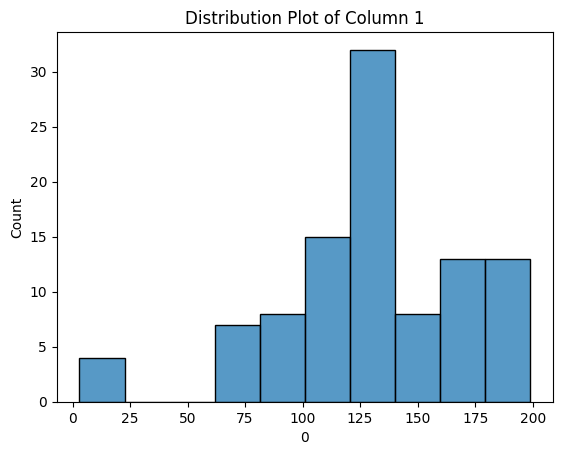

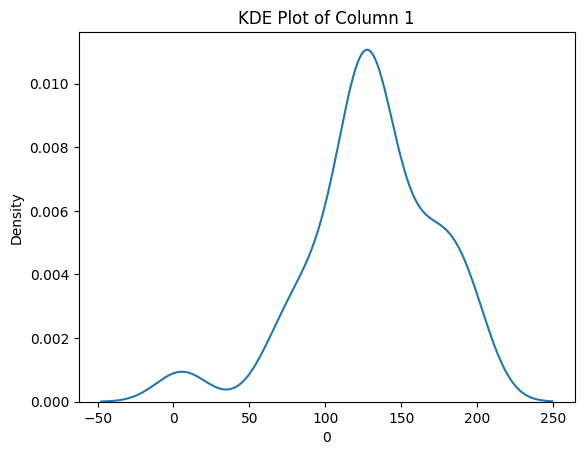

In [13]:
sns.histplot(df_filled.iloc[:,0])
plt.title("Distribution Plot of Column 1")
plt.show()

sns.kdeplot(df_filled.iloc[:,0])
plt.title("KDE Plot of Column 1")
plt.show()